<a href="https://colab.research.google.com/github/deinabo/New/blob/master/Copy_of_Just_For_Fun_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns

import scipy as sc
from scipy import stats, integrate
from scipy.stats.mstats import mode

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [0]:
songs=pd.read_csv('/gdrive/My Drive/featuresdf.csv')

In [0]:
streams=pd.read_csv('/gdrive/My Drive/data.csv')

In [6]:
songs

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581000,0.000000,0.0931,0.9310,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.229000,0.000000,0.0924,0.8130,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.209000,0.000000,0.1120,0.8460,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.049800,0.000014,0.1640,0.4460,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.055200,0.000000,0.1670,0.8110,80.924,288600.0,4.0
5,7KXjTSCq5nL1LoYtL7XAw,HUMBLE.,Kendrick Lamar,0.904,0.611,1.0,-6.842,0.0,0.0888,0.000259,0.000020,0.0976,0.4000,150.020,177000.0,4.0
6,3eR23VReFzcdmS7TYCrhC,It Ain't Me (with Selena Gomez),Kygo,0.640,0.533,0.0,-6.596,1.0,0.0706,0.119000,0.000000,0.0864,0.5150,99.968,220781.0,4.0
7,3B54sVLJ402zGa6Xm4YGN,Unforgettable,French Montana,0.726,0.769,6.0,-5.043,1.0,0.1230,0.029300,0.010100,0.1040,0.7330,97.985,233902.0,4.0
8,0KKkJNfGyhkQ5aFogxQAP,That's What I Like,Bruno Mars,0.853,0.560,1.0,-4.961,1.0,0.0406,0.013000,0.000000,0.0944,0.8600,134.066,206693.0,4.0
9,3NdDpSvN911VPGivFlV5d,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,0.735,0.451,0.0,-8.374,1.0,0.0585,0.063100,0.000013,0.3250,0.0862,117.973,245200.0,4.0


In [7]:
s1=songs.drop(columns='id').shift()[1:]
s1

,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581000,0.000000,0.0931,0.9310,95.977,233713.0,4.0
2,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.229000,0.000000,0.0924,0.8130,88.931,228827.0,4.0
3,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.209000,0.000000,0.1120,0.8460,177.833,228200.0,4.0
4,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.049800,0.000014,0.1640,0.4460,103.019,247160.0,4.0
5,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.055200,0.000000,0.1670,0.8110,80.924,288600.0,4.0
6,HUMBLE.,Kendrick Lamar,0.904,0.611,1.0,-6.842,0.0,0.0888,0.000259,0.000020,0.0976,0.4000,150.020,177000.0,4.0
7,It Ain't Me (with Selena Gomez),Kygo,0.640,0.533,0.0,-6.596,1.0,0.0706,0.119000,0.000000,0.0864,0.5150,99.968,220781.0,4.0
8,Unforgettable,French Montana,0.726,0.769,6.0,-5.043,1.0,0.1230,0.029300,0.010100,0.1040,0.7330,97.985,233902.0,4.0
9,That's What I Like,Bruno Mars,0.853,0.560,1.0,-4.961,1.0,0.0406,0.013000,0.000000,0.0944,0.8600,134.066,206693.0,4.0
10,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,0.735,0.451,0.0,-8.374,1.0,0.0585,0.063100,0.000013,0.3250,0.0862,117.973,245200.0,4.0


In [8]:
s2=s1.rename(columns={'name':'Track Name'})
s2

,Track Name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581000,0.000000,0.0931,0.9310,95.977,233713.0,4.0
2,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.229000,0.000000,0.0924,0.8130,88.931,228827.0,4.0
3,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.209000,0.000000,0.1120,0.8460,177.833,228200.0,4.0
4,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.049800,0.000014,0.1640,0.4460,103.019,247160.0,4.0
5,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.055200,0.000000,0.1670,0.8110,80.924,288600.0,4.0
6,HUMBLE.,Kendrick Lamar,0.904,0.611,1.0,-6.842,0.0,0.0888,0.000259,0.000020,0.0976,0.4000,150.020,177000.0,4.0
7,It Ain't Me (with Selena Gomez),Kygo,0.640,0.533,0.0,-6.596,1.0,0.0706,0.119000,0.000000,0.0864,0.5150,99.968,220781.0,4.0
8,Unforgettable,French Montana,0.726,0.769,6.0,-5.043,1.0,0.1230,0.029300,0.010100,0.1040,0.7330,97.985,233902.0,4.0
9,That's What I Like,Bruno Mars,0.853,0.560,1.0,-4.961,1.0,0.0406,0.013000,0.000000,0.0944,0.8600,134.066,206693.0,4.0
10,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,0.735,0.451,0.0,-8.374,1.0,0.0585,0.063100,0.000013,0.3250,0.0862,117.973,245200.0,4.0


In [9]:
s2.artists.value_counts(ascending=False)


The Chainsmokers    4
Ed Sheeran          4
Martin Garrix       3
Drake               3
Maroon 5            2
Imagine Dragons     2
Bruno Mars          2
Khalid              2
The Weeknd          2
Luis Fonsi          2
Kendrick Lamar      2
Clean Bandit        2
DJ Khaled           2
Post Malone         2
Calvin Harris       2
Future              1
Big Sean            1
Zedd                1
Lil Uzi Vert        1
Lauv                1
Katy Perry          1
Zion & Lennox       1
Jonas Blue          1
James Arthur        1
KYLE                1
Steve Aoki          1
Wisin               1
21 Savage           1
Danny Ocean         1
DJ Snake            1
                   ..
Miley Cyrus         1
Jax Jones           1
CNCO                1
Martin Jensen       1
Starley             1
Dua Lipa            1
Shawn Mendes        1
Camila Cabello      1
Shakira             1
Demi Lovato         1
Maggie Lindemann    1
The Vamps           1
Sam Hunt            1
Julia Michaels      1
J Balvin  

In [0]:
s3=pd.merge(streams,s2, on='Track Name')
s3=s3.drop(columns=['artists','URL'])
s3=s3[s3.Position == 1]
#s3=s3[s3.Streams > 90000]
s3

In [0]:

s3

In [0]:
s3.Region.value_counts()


In [126]:
s4=pd.DataFrame(s3['Track Name'].value_counts().head(10)).reset_index()
s4


,index,Track Name
0,Shape of You,1009
1,Despacito - Remix,643
2,Despacito (Featuring Daddy Yankee),486
3,rockstar,394
4,Mi Gente,281
5,Felices los 4,183
6,HUMBLE.,112
7,Something Just Like This,108
8,Look What You Made Me Do,88
9,Reggaetón Lento (Bailemos),67


In [127]:
s5=s4.rename(columns={'index':'Track Name','Track Name':'Chart_Appearance'})
s5

,Track Name,Chart_Appearance
0,Shape of You,1009
1,Despacito - Remix,643
2,Despacito (Featuring Daddy Yankee),486
3,rockstar,394
4,Mi Gente,281
5,Felices los 4,183
6,HUMBLE.,112
7,Something Just Like This,108
8,Look What You Made Me Do,88
9,Reggaetón Lento (Bailemos),67


In [0]:
s6=pd.merge(s5, s3, on='Track Name').drop(columns=['Streams', 'Date', 'Position', 'Region'])

In [0]:
s7=s6.drop_duplicates()

In [0]:
s7=s7.reset_index(drop=True)

In [0]:
new_order=['Artist','Track Name', 'Chart_Appearance','danceability',	'energy',	'key',	'loudness',	'mode','speechiness','acousticness','instrumentalness', 'liveness',	'valence', 'tempo',	'duration_ms', 'time_signature']

In [0]:
s8=s7[new_order]
s8

In [0]:
s8['Artist & Track Name']=s8['Artist'].str.cat(s8['Track Name'], sep =" ")

In [135]:
s=s8['Artist & Track Name']
s

0                          Ed Sheeran Shape of You
1                     Luis Fonsi Despacito - Remix
2    Luis Fonsi Despacito (Featuring Daddy Yankee)
3                             Post Malone rockstar
4                                J Balvin Mi Gente
5                             Maluma Felices los 4
6                           Kendrick Lamar HUMBLE.
7        The Chainsmokers Something Just Like This
8            Taylor Swift Look What You Made Me Do
9                  CNCO Reggaetón Lento (Bailemos)
Name: Artist & Track Name, dtype: object

In [0]:
s9=pd.DataFrame(s)
s9

In [137]:
s10=s8.drop(columns=['Artist', 'Track Name'])
s10

,Chart_Appearance,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Artist & Track Name
0,1009,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581000,0.000000,0.0931,0.931,95.977,233713.0,4.0,Ed Sheeran Shape of You
1,643,0.694,0.815,2.0,-4.328,1.0,0.1200,0.229000,0.000000,0.0924,0.813,88.931,228827.0,4.0,Luis Fonsi Despacito - Remix
2,486,0.660,0.786,2.0,-4.757,1.0,0.1700,0.209000,0.000000,0.1120,0.846,177.833,228200.0,4.0,Luis Fonsi Despacito (Featuring Daddy Yankee)
3,394,0.577,0.522,5.0,-6.594,0.0,0.0984,0.130000,0.000090,0.1420,0.119,159.772,218320.0,4.0,Post Malone rockstar
4,281,0.543,0.677,11.0,-4.915,0.0,0.0993,0.014800,0.000006,0.1300,0.294,103.809,189440.0,4.0,J Balvin Mi Gente
5,183,0.755,0.789,5.0,-4.502,1.0,0.1460,0.231000,0.000000,0.3510,0.737,93.973,229849.0,4.0,Maluma Felices los 4
6,112,0.904,0.611,1.0,-6.842,0.0,0.0888,0.000259,0.000020,0.0976,0.400,150.020,177000.0,4.0,Kendrick Lamar HUMBLE.
7,108,0.617,0.635,11.0,-6.769,0.0,0.0317,0.049800,0.000014,0.1640,0.446,103.019,247160.0,4.0,The Chainsmokers Something Just Like This
8,88,0.773,0.680,9.0,-6.378,0.0,0.1410,0.213000,0.000016,0.1220,0.497,128.062,211859.0,4.0,Taylor Swift Look What You Made Me Do
9,67,0.761,0.838,4.0,-3.073,0.0,0.0502,0.400000,0.000000,0.1760,0.710,93.974,222560.0,4.0,CNCO Reggaetón Lento (Bailemos)


In [138]:
s11=pd.concat([s, s10], axis=1)
s11

,Artist & Track Name,Chart_Appearance,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Artist & Track Name
0,Ed Sheeran Shape of You,1009,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581000,0.000000,0.0931,0.931,95.977,233713.0,4.0,Ed Sheeran Shape of You
1,Luis Fonsi Despacito - Remix,643,0.694,0.815,2.0,-4.328,1.0,0.1200,0.229000,0.000000,0.0924,0.813,88.931,228827.0,4.0,Luis Fonsi Despacito - Remix
2,Luis Fonsi Despacito (Featuring Daddy Yankee),486,0.660,0.786,2.0,-4.757,1.0,0.1700,0.209000,0.000000,0.1120,0.846,177.833,228200.0,4.0,Luis Fonsi Despacito (Featuring Daddy Yankee)
3,Post Malone rockstar,394,0.577,0.522,5.0,-6.594,0.0,0.0984,0.130000,0.000090,0.1420,0.119,159.772,218320.0,4.0,Post Malone rockstar
4,J Balvin Mi Gente,281,0.543,0.677,11.0,-4.915,0.0,0.0993,0.014800,0.000006,0.1300,0.294,103.809,189440.0,4.0,J Balvin Mi Gente
5,Maluma Felices los 4,183,0.755,0.789,5.0,-4.502,1.0,0.1460,0.231000,0.000000,0.3510,0.737,93.973,229849.0,4.0,Maluma Felices los 4
6,Kendrick Lamar HUMBLE.,112,0.904,0.611,1.0,-6.842,0.0,0.0888,0.000259,0.000020,0.0976,0.400,150.020,177000.0,4.0,Kendrick Lamar HUMBLE.
7,The Chainsmokers Something Just Like This,108,0.617,0.635,11.0,-6.769,0.0,0.0317,0.049800,0.000014,0.1640,0.446,103.019,247160.0,4.0,The Chainsmokers Something Just Like This
8,Taylor Swift Look What You Made Me Do,88,0.773,0.680,9.0,-6.378,0.0,0.1410,0.213000,0.000016,0.1220,0.497,128.062,211859.0,4.0,Taylor Swift Look What You Made Me Do
9,CNCO Reggaetón Lento (Bailemos),67,0.761,0.838,4.0,-3.073,0.0,0.0502,0.400000,0.000000,0.1760,0.710,93.974,222560.0,4.0,CNCO Reggaetón Lento (Bailemos)


In [0]:
s11.info()

In [0]:
s12=s11.iloc[:,0:15]
s12

In [0]:

tick_label = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten'] 
  

In [142]:
s13=pd.DataFrame({'Chart_Appearance':s12['Chart_Appearance'], 'Artist & Track Name':s12['Artist & Track Name']})
#s13['Artist & Track Name']
s13

,Chart_Appearance,Artist & Track Name
0,1009,Ed Sheeran Shape of You
1,643,Luis Fonsi Despacito - Remix
2,486,Luis Fonsi Despacito (Featuring Daddy Yankee)
3,394,Post Malone rockstar
4,281,J Balvin Mi Gente
5,183,Maluma Felices los 4
6,112,Kendrick Lamar HUMBLE.
7,108,The Chainsmokers Something Just Like This
8,88,Taylor Swift Look What You Made Me Do
9,67,CNCO Reggaetón Lento (Bailemos)


In [143]:
s14=pd.DataFrame(s12['Artist & Track Name'])
s15=s12['Chart_Appearance']
s14

,Artist & Track Name
0,Ed Sheeran Shape of You
1,Luis Fonsi Despacito - Remix
2,Luis Fonsi Despacito (Featuring Daddy Yankee)
3,Post Malone rockstar
4,J Balvin Mi Gente
5,Maluma Felices los 4
6,Kendrick Lamar HUMBLE.
7,The Chainsmokers Something Just Like This
8,Taylor Swift Look What You Made Me Do
9,CNCO Reggaetón Lento (Bailemos)


In [0]:
s15=[114, 64, 48, 46, 29, 20, 12, 10, 10, 7]

In [0]:
s16= ['Ed Sheeran Shape of You', 'Luis Fonsi Despacito – Remix', 'Luis Fonsi Despacito (Featuring Daddy Yankee)', 'Post Malone rockstar', 'J Balvin Mi Gente', 'Maluma Felices los 4', 'Kendrick Lamar HUMBLE.', 'The Chainsmokers Something Just Like This', 'Taylor Swift Look What You Made Me Do', 'CNCO Reggaetón Lento (Bailemos)']

In [152]:
s16

['Ed Sheeran Shape of You',
 'Luis Fonsi Despacito – Remix',
 'Luis Fonsi Despacito (Featuring Daddy Yankee)',
 'Post Malone rockstar',
 'J Balvin Mi Gente',
 'Maluma Felices los 4',
 'Kendrick Lamar HUMBLE.',
 'The Chainsmokers Something Just Like This',
 'Taylor Swift Look What You Made Me Do',
 'CNCO Reggaetón Lento (Bailemos)']

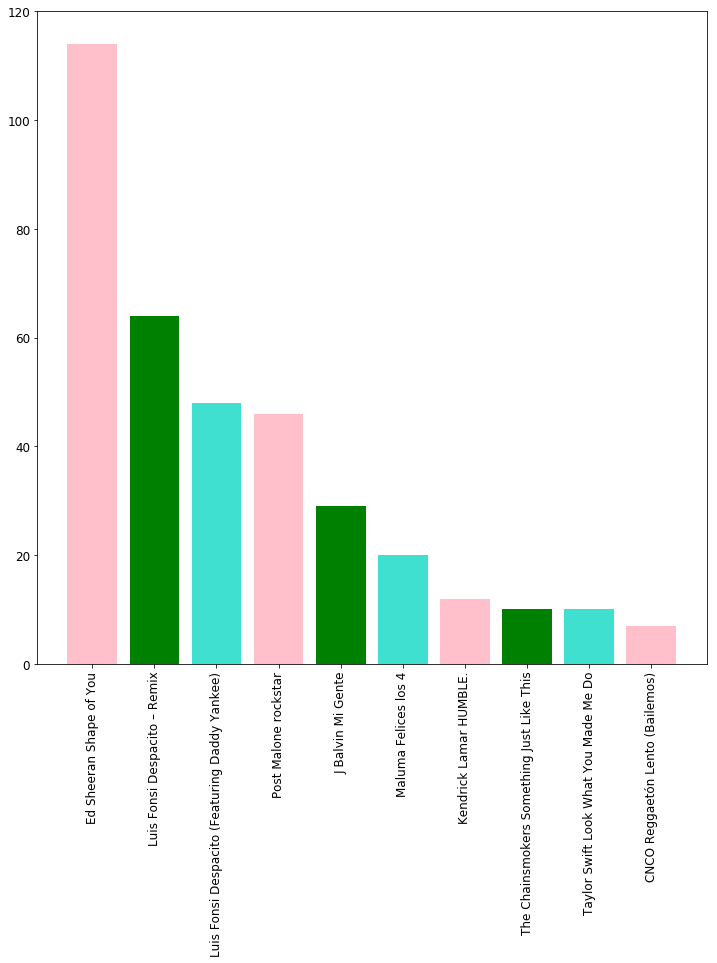

In [153]:
plt.figure(figsize=(12,12))

y_pos = np.arange(len(s16))
plt.bar(y_pos, s15, width = 0.8, color = ['pink', 'green', 'turquoise'])

plt.xticks(y_pos, s16, rotation=90)
plt.ylim(0, 120)

plt.show()

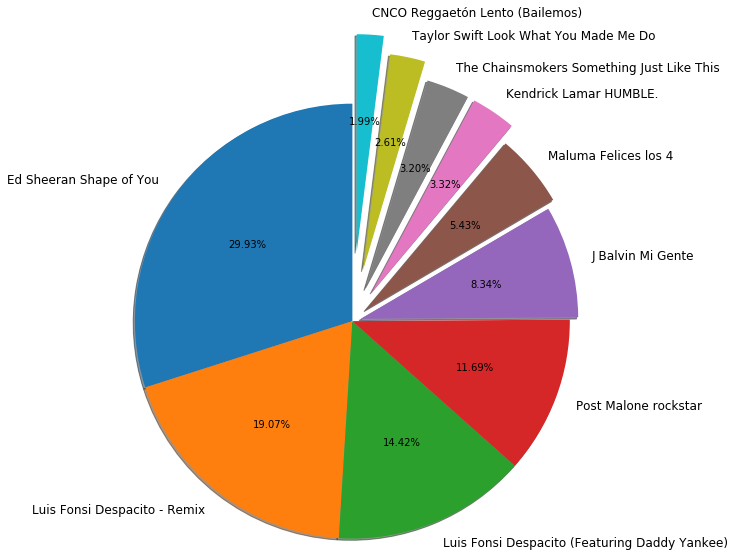

In [154]:
plt.pie(s12['Chart_Appearance'], labels = s12['Artist & Track Name'],   
        startangle=90, shadow = True, explode = (0, 0, 0, 0, 0.1, 0.2, 0.4, 0.4, 0.6, 0.8),
        radius = 2.5, autopct = '%1.2f%%')
plt.show()

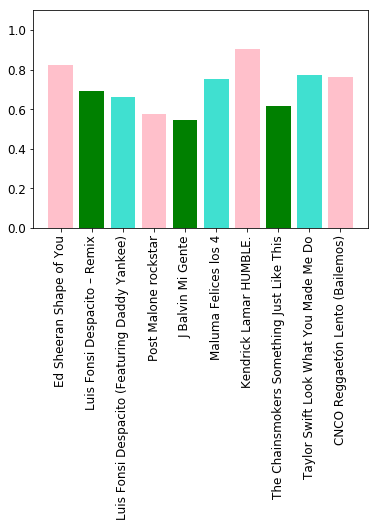

In [156]:
#plt.figure(figsize=(12,12))

y_pos = np.arange(len(s16))
plt.bar(y_pos, s12['danceability'], width = 0.8,color = ['pink', 'green', 'turquoise'])

plt.xticks(y_pos, s16, rotation=90)
plt.ylim(0, 1.1)


plt.show()

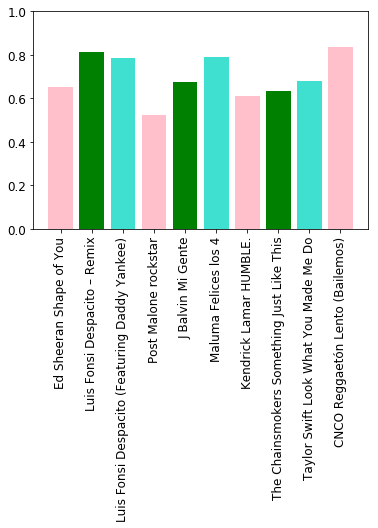

In [157]:
y_pos = np.arange(len(s16))
plt.bar(y_pos, s12['energy'], width = 0.8,color = ['pink', 'green', 'turquoise'])

plt.xticks(y_pos, s16, rotation=90)
plt.ylim(0, 1)


plt.show()

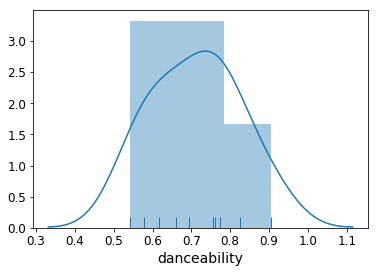

In [158]:
sns.distplot(s12['danceability'],norm_hist=True, rug=True, hist=True)
plt.show()

In [0]:
from scipy.stats import norm


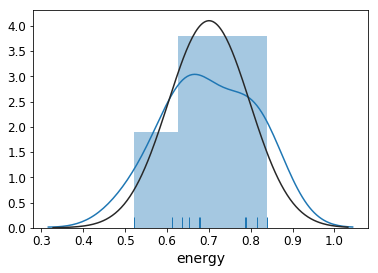

In [160]:
sns.distplot(s12['energy'], rug=True,fit=norm, norm_hist=True, hist=True)


In [0]:
key= {0:'C', 1:'C#/D♭', 2:'D', 3:'D#/E♭', 4:'E', 5:'F', 6:'F#/G♭', 7:'G', 8:'G#/A♭', 9:'A', 10:'A#/B♭', 11:'B'}

In [0]:
s12key=s12['key'].map(key)

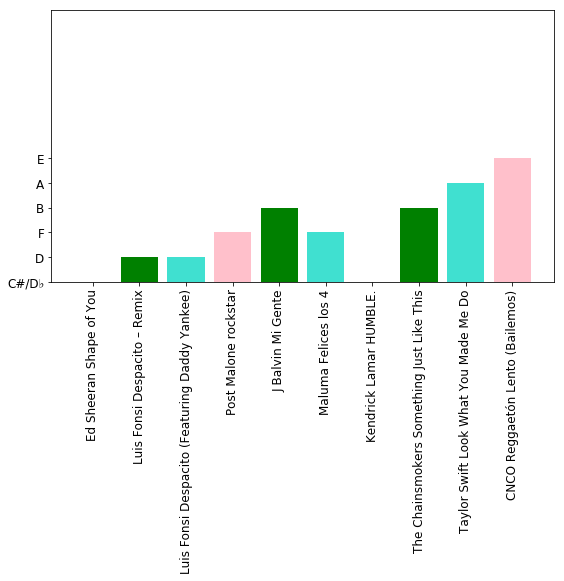

In [163]:
plt.figure(figsize=(9, 5))
y_pos = np.arange(len(s16))
plt.bar(y_pos, s12key, width = 0.8,color = ['pink', 'green', 'turquoise'])

plt.xticks(y_pos, s16, rotation=90)
plt.ylim(0, 11)


plt.show()

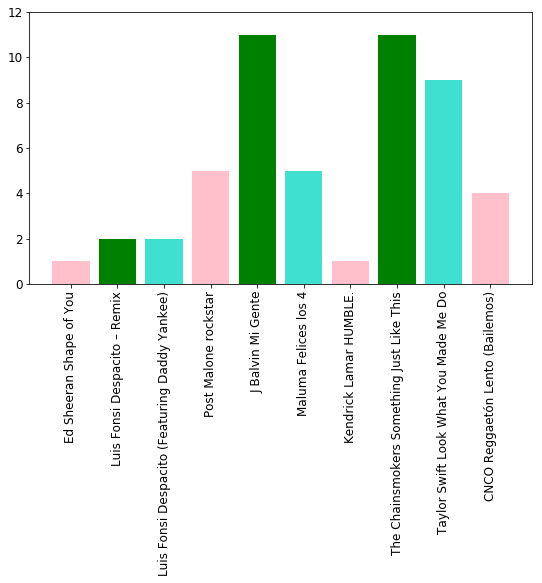

In [164]:
plt.figure(figsize=(9, 5))
y_pos = np.arange(len(s16))
plt.bar(y_pos, s12['key'], width = 0.8,color = ['pink', 'green', 'turquoise'])

plt.xticks(y_pos, s16, rotation=90)
plt.ylim(0, 12)


plt.show()

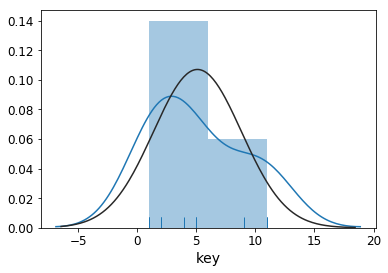

Median: 4.5
5.1
1.0
11.0


In [165]:
sns.distplot(s12['key'], rug=True,fit=norm, norm_hist=True, hist=True)
plt.show()
print('Median:',s12['key'].median())
print(s12['key'].mean())
print(s12['key'].min())
print(s12['key'].max())

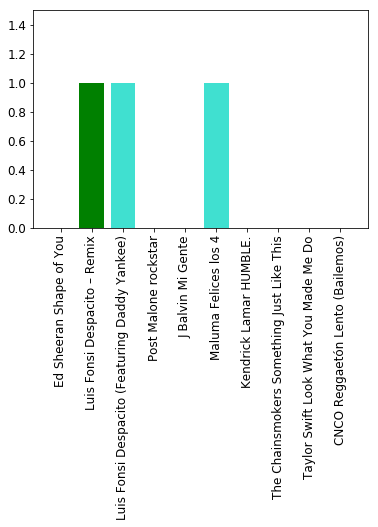

In [166]:
y_pos = np.arange(len(s16))
plt.bar(y_pos, s12['mode'], width = 0.8,color = ['pink', 'green', 'turquoise'])

plt.xticks(y_pos, s16, rotation=90)
plt.ylim(0, 1.5)


plt.show()

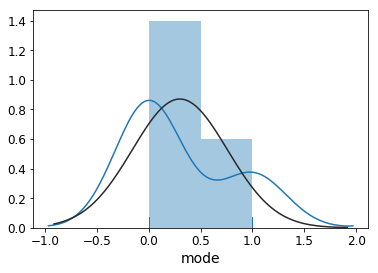

In [167]:
sns.distplot(s12['mode'], rug=True,fit=norm, norm_hist=True, hist=True)


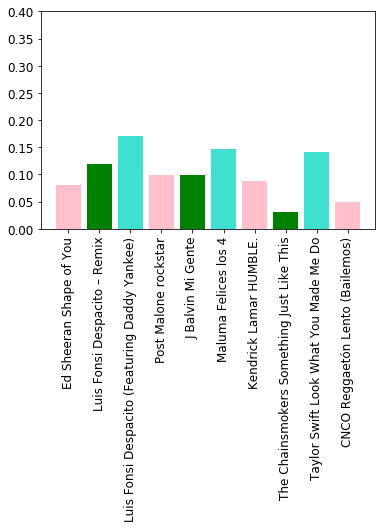

In [168]:
y_pos = np.arange(len(s16))
plt.bar(y_pos, s12['speechiness'], width = 0.8,color = ['pink', 'green', 'turquoise'])

plt.xticks(y_pos, s16, rotation=90)
plt.ylim(0, 0.4)


plt.show()

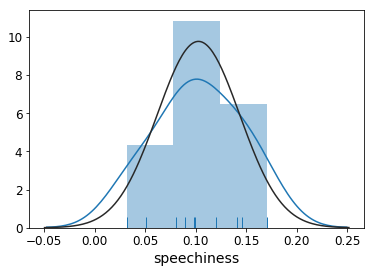

In [169]:
sns.distplot(s12['speechiness'], rug=True,fit=norm, norm_hist=True, hist=True)
plt.show()

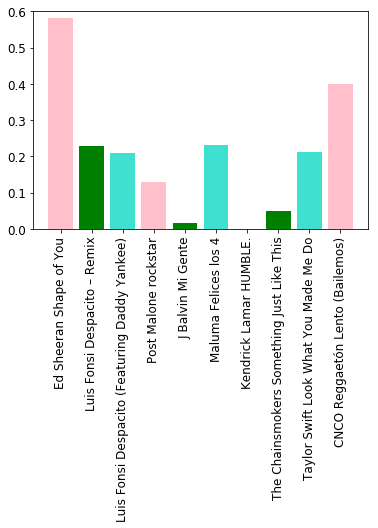

In [170]:
y_pos = np.arange(len(s16))
plt.bar(y_pos, s12['acousticness'], width = 0.8,color = ['pink', 'green', 'turquoise'])

plt.xticks(y_pos, s16, rotation=90)
plt.ylim(0, 0.6)


plt.show()

0.211
0.20578590000000002
0.000259
0.581


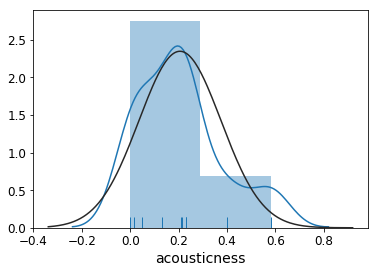

In [171]:
sns.distplot(s12['acousticness'], rug=True,fit=norm, norm_hist=True, hist=True)
print(s12['acousticness'].median())
print(s12['acousticness'].mean())
print(s12['acousticness'].min())
print(s12['acousticness'].max())

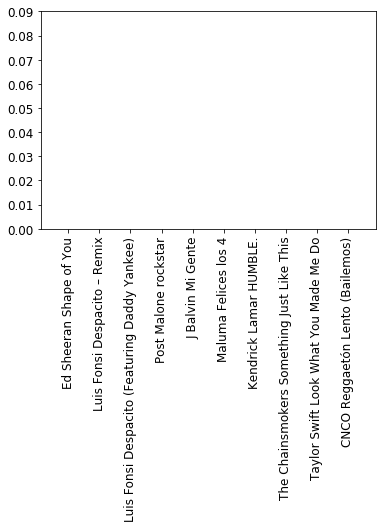

In [172]:
y_pos = np.arange(len(s16))
plt.bar(y_pos, s12['instrumentalness'], width = 0.8,color = ['pink', 'green', 'turquoise'])

plt.xticks(y_pos, s16, rotation=90)
plt.ylim(0.000001, 0.09000)


plt.show()

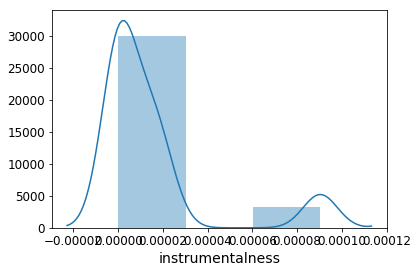

In [173]:
sns.distplot(s12['instrumentalness'],bins=3, norm_hist=True, hist=True)


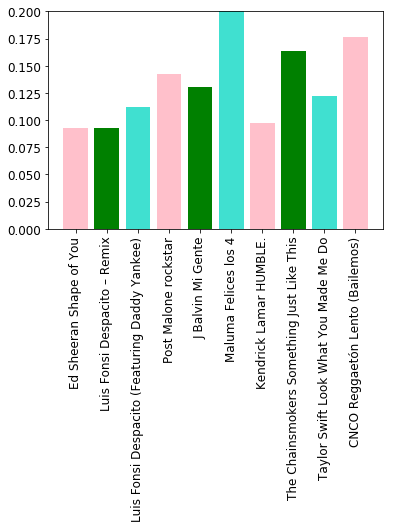

In [174]:
y_pos = np.arange(len(s16))
plt.bar(y_pos, s12['liveness'], width = 0.8,color = ['pink', 'green', 'turquoise'])

plt.xticks(y_pos, s16, rotation=90)
plt.ylim(0, 0.2)


plt.show()

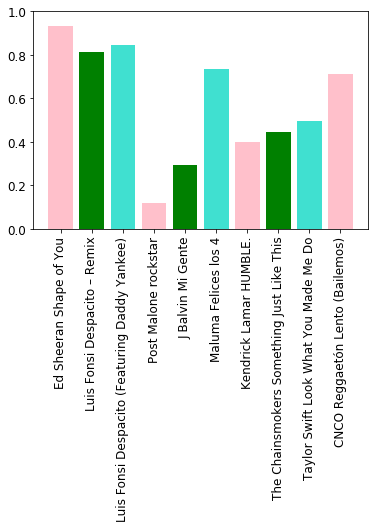

In [175]:
y_pos = np.arange(len(s16))
plt.bar(y_pos, s12['valence'], width = 0.8,color = ['pink', 'green', 'turquoise'])

plt.xticks(y_pos, s16, rotation=90)
plt.ylim(0, 1)


plt.show()

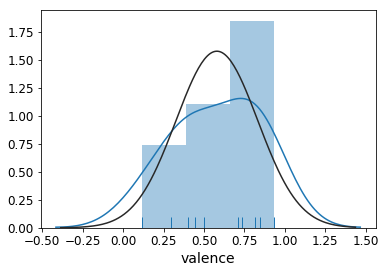

In [176]:
sns.distplot(s12['valence'], rug=True,fit=norm, norm_hist=True, hist=True)
plt.show()

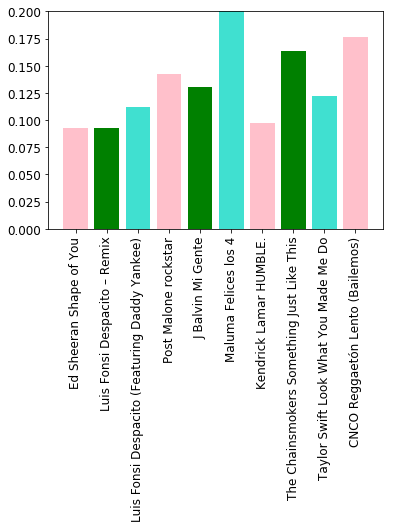

In [177]:
y_pos = np.arange(len(s16))
plt.bar(y_pos, s12['liveness'], width = 0.8,color = ['pink', 'green', 'turquoise'])

plt.xticks(y_pos, s16, rotation=90)
plt.ylim(0, 0.2)


plt.show()

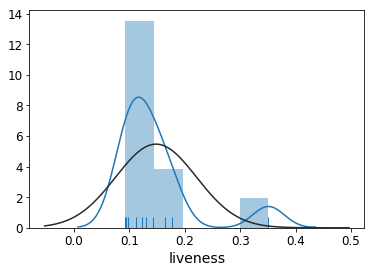

In [178]:
sns.distplot(s12['liveness'], rug=True,fit=norm, norm_hist=True, hist=True)
plt.show()

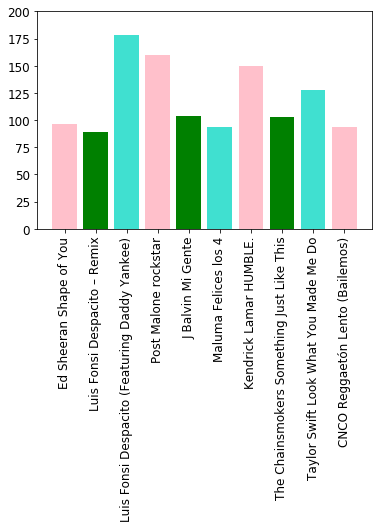

In [179]:
y_pos = np.arange(len(s16))
plt.bar(y_pos, s12['tempo'], width = 0.8,color = ['pink', 'green', 'turquoise'])

plt.xticks(y_pos, s16, rotation=90)
plt.ylim(0, 200)


plt.show()

119.53699999999999

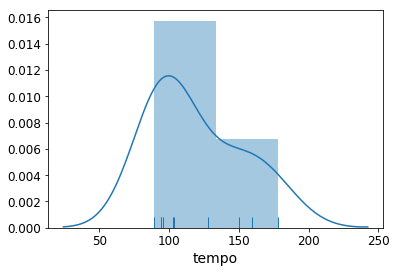

In [180]:
sns.distplot(s12['tempo'], rug=True, norm_hist=True, hist=True)
s12['tempo'].mean()

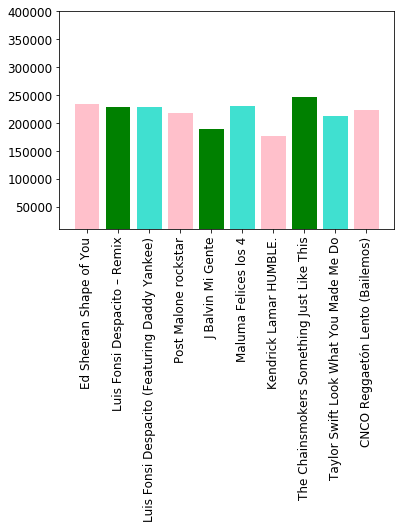

In [181]:
y_pos = np.arange(len(s16))
plt.bar(y_pos, s12['duration_ms'], width = 0.8,color = ['pink', 'green', 'turquoise'])

plt.xticks(y_pos, s16, rotation=90)
plt.ylim(10000, 400000)


plt.show()

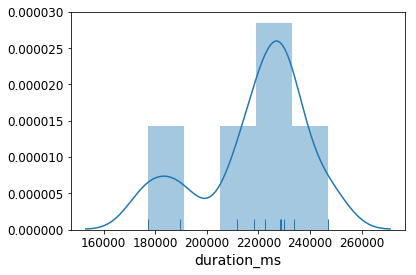

In [182]:
duration= sns.distplot(s12['duration_ms'], rug=True, norm_hist=True, hist=True)
plt.show()


In [183]:
/*dfnew = pd.merge(df, df3, on='track_name')
dfnew = dfnew.drop(columns=['artists'])
dfnew.sort_values(by='date')
dfnew.head()*/

SyntaxError: ignored

In [0]:
s1.describe()

In [0]:
s12

In [0]:
s17=s12.select_dtypes('number')

In [0]:
s12.info()

In [0]:
s17=s17.drop(columns=['time_signature'])

In [0]:
s17

In [0]:
#s18=s17.drop(columns=['loudness', 'mode', 'instrumentalness'])

In [0]:
#s18['time_signature']=s12['time_signature']

In [0]:

plt.figure(figsize=(11, 5))
plt.xticks(rotation=90)
sns.heatmap(s17.corr(), cmap='coolwarm', annot=True)
plt.show()

In [0]:
s17.cov()

In [0]:
s17.cov().describe()

In [0]:
s18.info()

In [0]:
from sklearn.decomposition import PCA


In [0]:
pca=PCA(n_components=11)
pca.fit(s18.values) 

s18_pca = pca.fit_transform(s18[['Chart_Appearance', 'danceability', 'energy', 'key', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms']].values) 

#let's check the shape of df_new_pca array
print("shape of s18_pca", s18_pca.shape)

In [0]:
const = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']
len(const)

In [0]:
pca_exp_var = pd.DataFrame(pca.explained_variance_, index = const, columns = ["variance"])

pca_pctexp_var = pd.DataFrame(pca.explained_variance_ratio_ * 100, index = const, columns = ["% variance"])

pca_exp_var.merge(pca_pctexp_var, left_index = True, right_index = True)

In [0]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler() 

scaler.fit(s17.values) 

s17_scaled = scaler.transform(s17.values)

In [0]:
pca = PCA(n_components=11)
 

s17_pca = pca.fit_transform(s17_scaled) 


print("s17_pca", s17_pca.shape)

In [0]:
https://seaborn.pydata.org/tutorial/distributions.html

In [0]:
use rugplot?